In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
import os
os.getcwd()

'/content'

In [3]:
df = pd.read_csv("/content/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


RowNumber, CustomerId, Surname are not useful we are going to drop them

In [5]:
df.drop(["RowNumber","CustomerId","Surname"], axis=1,inplace=True)

# Descriptive Analysis

In [6]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Univariate Analysis

In [7]:
# Mean

df.iloc[:, 2:].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Age                    38.921800
Tenure                  5.012800
Balance             76485.889288
NumOfProducts           1.530200
HasCrCard               0.705500
IsActiveMember          0.515100
EstimatedSalary    100090.239881
Exited                  0.203700
dtype: float64

In [8]:
# Median

df.iloc[:, 2:].median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Age                    37.000
Tenure                  5.000
Balance             97198.540
NumOfProducts           1.000
HasCrCard               1.000
IsActiveMember          1.000
EstimatedSalary    100193.915
Exited                  0.000
dtype: float64

In [9]:
# Standard Deviation

df.iloc[:, 2:].std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Age                   10.487806
Tenure                 2.892174
Balance            62397.405202
NumOfProducts          0.581654
HasCrCard              0.455840
IsActiveMember         0.499797
EstimatedSalary    57510.492818
Exited                 0.402769
dtype: float64


**Mean** = average of the values 

**Median** = 50th percentile given in the column is the median

**Standard Deviation** = std column 


In [10]:
# Mode

df.iloc[:, 2:].mode()

,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Male,37,2,0.0,1,1,1,24924.92,0


In [11]:
# Variance

df.iloc[:, 2:].var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Age                1.099941e+02
Tenure             8.364673e+00
Balance            3.893436e+09
NumOfProducts      3.383218e-01
HasCrCard          2.077905e-01
IsActiveMember     2.497970e-01
EstimatedSalary    3.307457e+09
Exited             1.622225e-01
dtype: float64

In [12]:
# Skewness

df.iloc[:, 2:].skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

In [13]:
# Kurtosis

df.iloc[:, 2:].kurtosis()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Age                1.395347
Tenure            -1.165225
Balance           -1.489412
NumOfProducts      0.582981
HasCrCard         -1.186973
IsActiveMember    -1.996747
EstimatedSalary   -1.181518
Exited             0.165671
dtype: float64

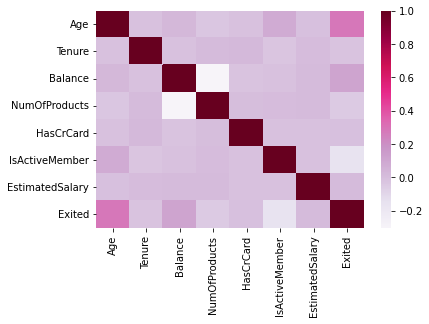

In [14]:
corr = df.iloc[:, 2:].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='PuRd')

### Handle the Missing values

In [15]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There are no missing values in the dataset!

### Find the outliers and replace the outliers

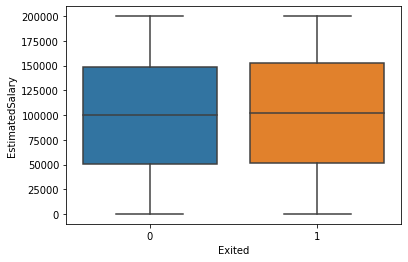

In [16]:
sns.boxplot(y="EstimatedSalary", x="Exited", data=df)

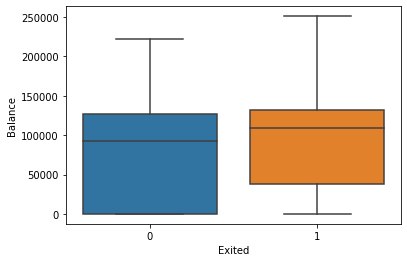

In [17]:
sns.boxplot(y="Balance", x="Exited", data=df)

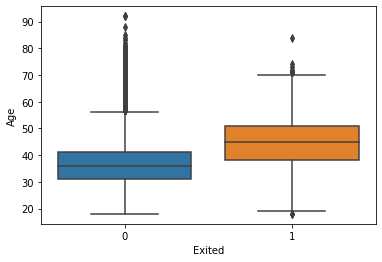

In [18]:
sns.boxplot(y="Age", x="Exited", data=df)

Age column has outliers that has to be removed!

In [19]:
q25 = np.quantile(df["Age"],0.25)
q75 = np.quantile(df["Age"],0.75)

iqr = q75 - q25

lower = q25 - 1.5 * iqr
upper = q75 + 1.5 * iqr

print('The IQR is', iqr)
print('The lower bound value is', lower)
print('The upper bound value is', upper)

The IQR is 12.0
The lower bound value is 14.0
The upper bound value is 62.0


In [20]:
df = df[(df["Age"] < upper) & (df["Age"] > lower)]

### Check for Categorical columns and perform encoding

In [21]:
categorical_col = [col for col in df.columns if df[col].dtype == "object" and df[col].nunique() < 10]
categorical_col

['Geography', 'Gender']

In [22]:
df = pd.get_dummies(df, columns = categorical_col)

In [23]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


### Split the data into dependent and independent variables

Here, "Exited" is the dependent variable!

In [24]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [25]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [26]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

### Split the data into training and testing

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Scale the independent variables

In [28]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
train = scale.fit_transform(X_train)
test = scale.transform(X_test)

In [29]:
X_train = pd.DataFrame(train, columns=X_train.columns)
X_test = pd.DataFrame(test, columns=X_test.columns)

# Bivariate Analysis 

### Logistic Regression (Age & Exited)

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression

In [31]:
X_train_age = np.array(X_train['Age']).reshape(-1, 1)
X_test_age = np.array(X_test['Age']).reshape(-1, 1)
# y_train_exited = np.array(y_train['Exited']).reshape(-1, 1)

In [32]:
model_1 = LogisticRegression()
model_1.fit(X_train_age, y_train)

pred = model_1.predict(X_test_age)

print(confusion_matrix(y_test, pred))
print()
print(classification_report(y_test, pred))

[[1456   54]
 [ 336   72]]

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1510
           1       0.57      0.18      0.27       408

    accuracy                           0.80      1918
   macro avg       0.69      0.57      0.58      1918
weighted avg       0.76      0.80      0.75      1918



# Multivariate Analysis (all independent features & Exited)

In [33]:
model = LogisticRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)

print(confusion_matrix(y_test, pred))
print()
print(classification_report(y_test, pred))

[[1447   63]
 [ 289  119]]

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1510
           1       0.65      0.29      0.40       408

    accuracy                           0.82      1918
   macro avg       0.74      0.62      0.65      1918
weighted avg       0.80      0.82      0.79      1918

